MultiLinear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Housing1.csv')
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X.shape

(545, 12)

In [ ]:
df.isnull().any()

,0
price,False
area,False
bedrooms,False
bathrooms,False
stories,False
mainroad,False
guestroom,False
basement,False
hotwaterheating,False
airconditioning,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X ['mainroad'] = le.fit_transform(X['mainroad'])
X ['guestroom'] = le.fit_transform(X['guestroom'])
X ['basement'] = le.fit_transform(X['basement'])
X ['hotwaterheating'] = le.fit_transform(X['hotwaterheating'])
X ['airconditioning'] = le.fit_transform(X['airconditioning'])
X ['prefarea'] = le.fit_transform(X['prefarea'])
X ['furnishingstatus'] = le.fit_transform(X['furnishingstatus'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_test,y_test)

0.6578047592637595

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.6578047592637595

# **Polynomial Regression**

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = df[['area']]
y_poly = df['price']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=0)

In [ ]:
reg = PolynomialFeatures(degree=4)
X_train_poly_transformed = reg.fit_transform(X_train_poly)
X_test_poly_transformed = reg.transform(X_test_poly)

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly_transformed,y_train_poly)

LinearRegression()

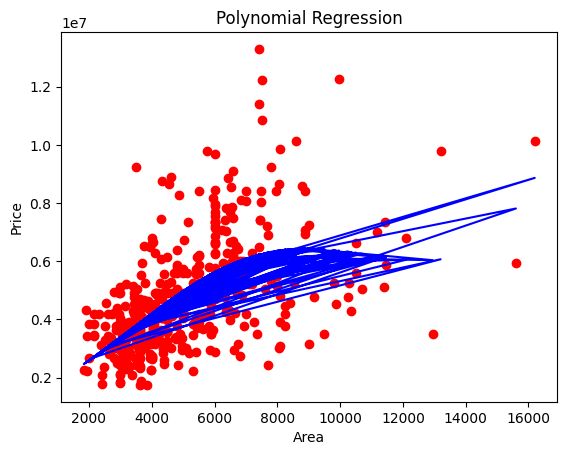

In [ ]:
plt.scatter(X_train_poly, y_train_poly, color='red')
plt.plot(X_train_poly, lin_reg_2.predict(X_train_poly_transformed), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_poly = r2_score(y_test_poly, lin_reg_2.predict(X_test_poly_transformed))
print(r2_poly)

0.3397615944502539


# **Support Vector Regressor**

In [ ]:
df = pd.read_csv('Housing1.csv')
y = df['price']
X = df.drop('price',axis=1)
# y = np.array(y).reshape(-1,1)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X ['mainroad'] = le.fit_transform(X['mainroad'])
X ['guestroom'] = le.fit_transform(X['guestroom'])
X ['basement'] = le.fit_transform(X['basement'])
X ['hotwaterheating'] = le.fit_transform(X['hotwaterheating'])
X ['airconditioning'] = le.fit_transform(X['airconditioning'])
X ['prefarea'] = le.fit_transform(X['prefarea'])
X ['furnishingstatus'] = le.fit_transform(X['furnishingstatus'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sa=StandardScaler()
sbe=StandardScaler()
sba=StandardScaler()
ss=StandardScaler()
sm=StandardScaler()
sg=StandardScaler()
sb=StandardScaler()
sp=StandardScaler()
shw=StandardScaler()
sac=StandardScaler()
spr=StandardScaler()
sf=StandardScaler()
X['area']=sa.fit_transform(X[['area']])
X['bedrooms']=sbe.fit_transform(X[['bedrooms']])
X['bathrooms']=sba.fit_transform(X[['bathrooms']])
X['stories']=ss.fit_transform(X[['stories']])
X['mainroad']=sm.fit_transform(X[['mainroad']])
X['guestroom']=sg.fit_transform(X[['guestroom']])
X['parking']=sp.fit_transform(X[['parking']])
X['basement']=sb.fit_transform(X[['basement']])
X['hotwaterheating']=shw.fit_transform(X[['hotwaterheating']])
X['airconditioning']=sac.fit_transform(X[['airconditioning']])
X['prefarea']=spr.fit_transform(X[['prefarea']])
X['furnishingstatus']=sf.fit_transform(X[['furnishingstatus']])

In [ ]:
sc = StandardScaler()
y = sc.fit_transform(y.values.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)

In [ ]:
from sklearn.svm import SVR
sv = SVR(kernel = 'rbf')
sv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
y_pred

array([ 1.05901833,  0.4002647 ,  0.83500242,  0.78117276, -0.18597491,
       -0.84783162, -0.72691009,  0.43649966, -0.89604335, -0.16266553,
       -0.74616796, -0.76273009,  0.12497062, -0.03792518,  0.05411031,
        1.93045452, -0.32894082, -0.62840037,  0.57698048, -1.03910928,
       -0.45555302,  0.29618741,  0.08109348, -0.68756129, -0.09716515,
        1.11883306, -0.97107947,  1.34590565,  1.51650688, -0.5603634 ,
        1.05060149,  1.04753824, -0.30177507, -0.12544471,  0.85048093,
       -0.45990859,  0.17224536, -0.65776621,  0.29615044,  0.41275123,
       -0.38496395, -0.91433966, -0.8477123 , -0.27524046,  0.39140491,
       -0.89380167,  0.25301287, -1.1585824 , -0.87703644, -0.82126058,
       -0.17890417, -0.27297746, -1.05230002, -0.55776945, -0.14082809,
       -0.21038296, -0.82517766, -0.17889254, -0.48202092, -0.43518659,
        0.92492604,  1.10354244, -1.03990312, -0.30137124, -0.09423575,
       -1.25724752, -0.32504189, -0.9957032 , -0.13033772, -0.20

In [ ]:
print(sc.inverse_transform(y_pred.reshape(-1,1)))

[[6745740.96717595]
 [5514713.02965122]
 [6327117.33733465]
 [6226524.61043667]
 [4419193.68306696]
 [3182366.94304518]
 [3408335.7763984 ]
 [5582426.13576398]
 [3092272.57869539]
 [4462752.46483325]
 [3372348.15086134]
 [3341398.11528914]
 [5000264.69827254]
 [4695857.60655556]
 [4867846.41660174]
 [8374213.67435978]
 [4152030.02455093]
 [3592423.13716356]
 [5844945.84242448]
 [2824922.01970235]
 [3915426.92611485]
 [5320221.41395233]
 [4918270.49243856]
 [3481867.76427093]
 [4585154.50485952]
 [6857518.13085806]
 [2952050.87731067]
 [7281853.86113228]
 [7600660.27426287]
 [3719565.36206959]
 [6730012.24004767]
 [6724287.86828841]
 [4202795.28140891]
 [4532307.86150111]
 [6356042.37374589]
 [3907287.55999979]
 [5088608.09243667]
 [3537546.51529779]
 [5320152.34193113]
 [5538046.896424  ]
 [4047338.33113136]
 [3058081.85711139]
 [3182589.92989447]
 [4252381.12362279]
 [5498156.54382534]
 [3096461.66726288]
 [5239540.18145564]
 [2601659.86994003]
 [3127791.23239136]
 [3232020.85003213]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6313066870412861

SimpleLinear Regression

In [ ]:
df =  pd.read_csv('Housing1.csv')
X=df["area"]
y=df["price"]
X=X.values.reshape(-1,1);
y=y.values.reshape(-1,1);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_test,y_test)

0.3067292122216637

In [ ]:
from sklearn.metrics import r2_score
y_pred =regressor.predict(X_test)
r2_score(y_test,y_pred)

0.3067292122216637

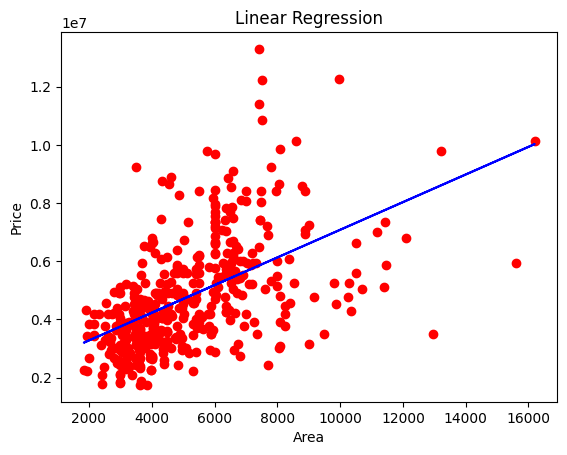

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

DecisionTree Regression

In [ ]:
df=pd.read_csv("Housing1.csv")
X=df.drop("price",axis=1)
y=df["price"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["mainroad"]=le.fit_transform(X["mainroad"])
X["guestroom"]=le.fit_transform(X["guestroom"])
X["basement"]=le.fit_transform(X["basement"])
X["hotwaterheating"]=le.fit_transform(X["hotwaterheating"])
X["airconditioning"]=le.fit_transform(X["airconditioning"])
X["prefarea"]=le.fit_transform(X["prefarea"])
X["furnishingstatus"]=le.fit_transform(X["furnishingstatus"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4582130410585725

RandomForest Regression


In [ ]:
df=pd.read_csv("Housing1.csv")
X=df.drop("price",axis=1)
y=df["price"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["mainroad"]=le.fit_transform(X["mainroad"])
X["guestroom"]=le.fit_transform(X["guestroom"])
X["basement"]=le.fit_transform(X["basement"])
X["hotwaterheating"]=le.fit_transform(X["hotwaterheating"])
X["airconditioning"]=le.fit_transform(X["airconditioning"])
X["prefarea"]=le.fit_transform(X["prefarea"])
X["furnishingstatus"]=le.fit_transform(X["furnishingstatus"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6407981036410295